In [147]:
import matplotlib as plot
import pandas as pd
import numpy as np

In [150]:
df = pd.read_csv('trial_history.csv')
df['rolling_mean']=df['perf_tracker'].rolling(50).mean()
df.head(10)

,Unnamed: 0,number_of_episodes,weight_history,noise_history,number_of_steps,perf_tracker,rolling_mean
0,0,1,[[0.00339243 0.00415421]\n [0.00395111 0.00498...,0.005000,28,28.0,NaN
1,1,2,[[0.00570868 0.00590627]\n [0.00439788 0.00611...,0.002500,29,29.0,NaN
2,2,3,[[0.00630111 0.00694815]\n [0.00478376 0.00672...,0.001250,34,34.0,NaN
3,3,4,[[0.0067025 0.00702678]\n [0.00515264 0.00683...,0.000625,35,35.0,NaN
4,4,5,[[0.00670475 0.00723527]\n [0.00537253 0.00711...,0.000313,36,36.0,NaN
5,5,6,[[0.00720411 0.00726562]\n [0.00549761 0.00702...,0.000625,37,9.0,NaN
6,6,7,[[0.00672373 0.00766089]\n [0.00516962 0.00738...,0.001250,37,8.0,NaN
7,7,8,[[0.00720224 0.0081234 ]\n [0.00522356 0.00793...,0.000625,38,38.0,NaN
8,8,9,[[0.00693429 0.00833208]\n [0.00609549 0.00741...,0.001250,44,10.0,NaN
9,9,10,[[0.00800581 0.00952015]\n [0.00644932 0.00840...,0.002500,44,9.0,NaN


<AxesSubplot:xlabel='number_of_episodes'>

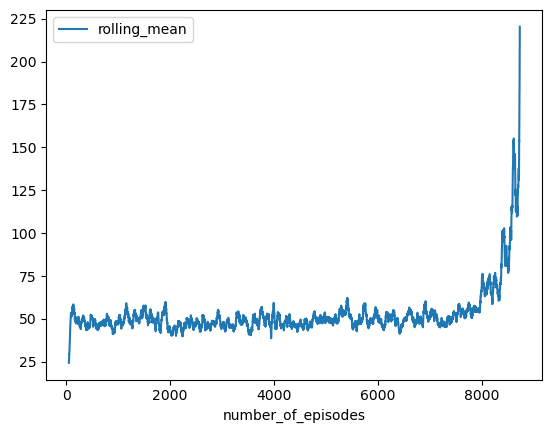

In [151]:
df.plot.line(x = 'number_of_episodes', y = 'rolling_mean')

<AxesSubplot:xlabel='number_of_episodes'>

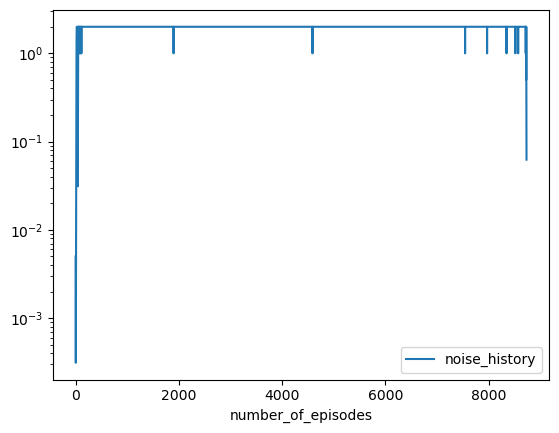

In [152]:
df.plot.line(x = 'number_of_episodes', y = 'noise_history', logy= True)